In [73]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np
from matplotlib import pyplot as plt

In [74]:
train_X = pd.read_csv('../data/curated/final_train_X.csv')
train_Y = pd.read_csv('../data/curated/train_Y.csv')
val_X = pd.read_csv('../data/curated/final_val_X.csv')
val_Y = pd.read_csv('../data/curated/val_Y.csv')
test_X = pd.read_csv('../data/curated/final_test_X.csv')

In [75]:
clf = KNeighborsClassifier(metric='euclidean', n_neighbors=17, weights= 'uniform')

In [76]:
clf.fit(X=train_X, y=train_Y)

/Users/devin/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [77]:
accuracy_score(y_pred=clf.predict(val_X), y_true=val_Y)

0.8212290502793296

In [78]:
prediction = clf.predict(test_X)

In [79]:
raw_test_data = pd.read_csv('../data/raw/test.csv')

In [80]:
knn_pred = pd.DataFrame({
    'PassengerId': raw_test_data['PassengerId'],
    'Survived': prediction
})

In [81]:
knn_pred.to_csv('../data/curated/knn_pred.csv', index=False)

In [82]:
importance = permutation_importance(clf, val_X, val_Y, scoring='accuracy', n_repeats=10, random_state=42)

In [83]:
sorted_index = importance.importances_mean.argsort()

In [84]:
sorted_index

array([24, 42, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 46, 45,
       44, 61, 43, 62, 64, 83, 82, 81, 80, 78, 77, 76, 75, 74, 73, 72, 71,
       70, 69, 67, 66, 65, 63, 84, 85, 40, 12, 13, 14, 15, 16, 17, 18, 41,
       22, 25, 26, 27, 21, 29, 39, 38, 37, 28, 36, 35, 34,  4, 32, 31, 30,
       33, 68, 50,  5, 20, 79,  9,  3,  8,  7, 10,  2, 11, 19,  1,  0, 23,
        6])

In [85]:
importance.importances_mean

array([ 0.02346369,  0.02011173,  0.01340782,  0.01117318,  0.        ,
        0.00391061,  0.05027933,  0.01173184,  0.01173184,  0.00893855,
        0.01173184,  0.01396648,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.01564246,
        0.00446927,  0.        ,  0.        ,  0.02793296, -0.00558659,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00111732,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00055866,  0.  

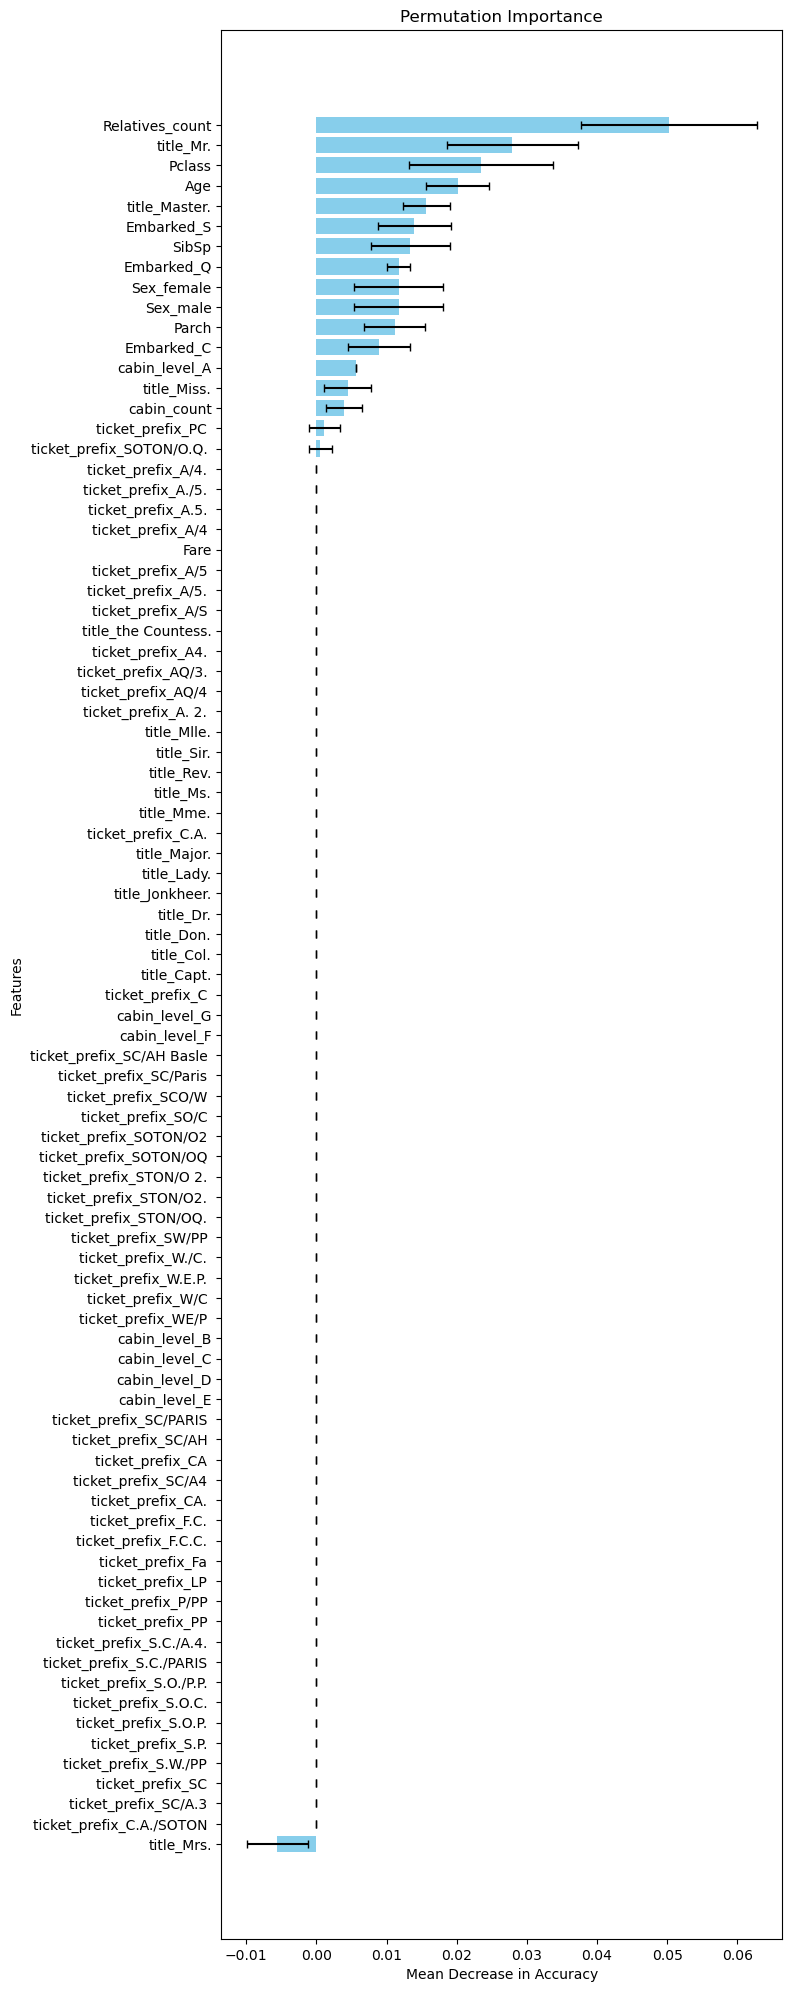

In [86]:
plt.figure(figsize=(8,20))
plt.barh(y=range(len(sorted_index)),
        width=importance.importances_mean[sorted_index],
        xerr=importance.importances_std[sorted_index],
        color='skyblue',
        align='center',
        ecolor='black',
        capsize=3)
plt.yticks(ticks=range(len(sorted_index)), labels=np.array(train_X.columns)[sorted_index])
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout(pad=1.0)
plt.savefig('../plot/KNN_permutation_importance.png')
plt.show()

### drop zero importance featrues

In [87]:
zero_importance_features = [train_X.columns[i] for i in range(len(train_X.columns)) if importance.importances_mean[i] <= 0]

In [88]:
len(zero_importance_features)

69

In [89]:
len(train_X.columns)

86

In [90]:
dropped_train_X = train_X.drop(columns=zero_importance_features)
dropped_val_X = val_X.drop(columns=zero_importance_features)
dropped_test_X = test_X.drop(columns=zero_importance_features)

In [91]:
droppped_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [92]:
droppped_clf.fit(X=dropped_train_X, y=train_Y)

/Users/devin/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [93]:
accuracy_score(y_pred=droppped_clf.predict(dropped_val_X), y_true=val_Y)

0.8324022346368715

In [94]:
dropped_prediction = droppped_clf.predict(dropped_test_X)

In [95]:
dropped_knn_pred = pd.DataFrame({
    'PassengerId': raw_test_data['PassengerId'],
    'Survived': dropped_prediction
})

In [96]:
dropped_knn_pred.to_csv('../data/curated/dropped_knn_pred.csv', index=False)